In [17]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Save the train and test DataFrames
X_TRAIN_DIR = "processed_data/glcm/X_train.pkl"
y_TRAIN_DIR = "processed_data/glcm/y_train.pkl"
X_TEST_DIR = "processed_data/glcm/X_test.pkl"
y_TEST_DIR = "processed_data/glcm/y_test.pkl"

X_train = pd.read_pickle(X_TRAIN_DIR)
y_train = pd.read_pickle(y_TRAIN_DIR)
X_test = pd.read_pickle(X_TEST_DIR)
y_test = pd.read_pickle(y_TEST_DIR)

In [50]:
def xgboost_classification(X_train, y_train, X_test, y_test):
    """
    Perform XGBoost multiclass classification, evaluate the model, and create a confusion matrix.

    Parameters:
    X_train (torch.Tensor): Training features.
    y_train (torch.Tensor): Training labels.
    X_test (torch.Tensor): Testing features.
    y_test (torch.Tensor): Testing labels.

    Returns:
    None
    """
    
    # Create a label encoder
    label_encoder = LabelEncoder()
    
    # Encode the class labels
    y_train_encoded = label_encoder.fit_transform(y_train)
    y_test_encoded = label_encoder.transform(y_test)
    
    # Inverse transform for class labels in the confusion matrix
    class_labels = label_encoder.classes_
    
    # Create a DMatrix for XGBoost
    dtrain = xgb.DMatrix(X_train, label=y_train_encoded)
    dtest = xgb.DMatrix(X_test)

    # Define parameters for the XGBoost model
    params = {
        'objective': 'multi:softprob',  # Multiclass classification
        'num_class': len(class_labels),  # Number of classes
        'max_depth': 6,  # Maximum depth of trees
        'eta': 0.3,  # Learning rate
        'subsample': 1,  # Fraction of samples used for training
        'colsample_bytree': 0.7,  # Fraction of features used for training
    }

    num_round = 100  # Number of boosting rounds

    # Train the XGBoost model
    model = xgb.train(params, dtrain, num_round)

    # Predict labels
    y_pred_prob = model.predict(dtest)
    y_pred = [class_labels[idx] for idx in np.argmax(y_pred_prob, axis=1)]  # Convert probabilities to class labels

    # Create a confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix as a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")
    plt.show()

    # Print classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    

c:\Users\jonas\anaconda3\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\jonas\anaconda3\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\jonas\anaconda3\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\jonas\anaconda3\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
c

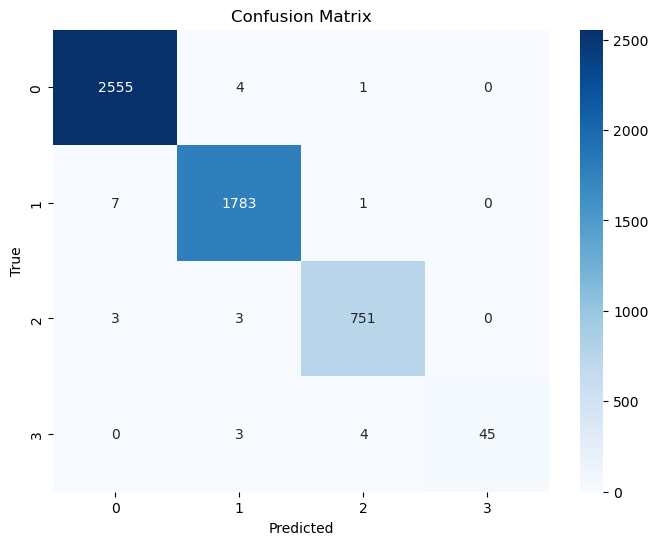

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2560
           1       0.99      1.00      0.99      1791
           2       0.99      0.99      0.99       757
           3       1.00      0.87      0.93        52

    accuracy                           0.99      5160
   macro avg       1.00      0.96      0.98      5160
weighted avg       0.99      0.99      0.99      5160



In [51]:
# Call the xgboost_classification function with your data
xgboost_classification(X_train, y_train, X_test, y_test)